In [1]:
# %matplotlib widget
import numpy as np 
import pandas as pd
from natsort import natsorted
import matplotlib.pyplot as plt
import os
import sys
import importlib

In [3]:
def parse_frame_capture_file(path_to_file: str) -> pd.DataFrame:
    frame_timing_df: pd.DataFrame = pd.read_csv(path_to_file, header=None, names=['Begin', 'End'])

    return frame_timing_df 

In [10]:
# Define macro information about where to find the directories/files for all of the data
path_to_ssd: str = '/Volumes/EXTERNAL1'         
experiment_name: str = 'frameCaptureTime_5hz_0NDF'
frequency: float = 5
NDF: int = 0 

In [13]:
# Define paths to individual sensor readings
world_cam_dir: str = os.path.join(path_to_ssd, experiment_name, f'{experiment_name}_world')
pupil_cam_dir: str = os.path.join(path_to_ssd, experiment_name, f'{experiment_name}_pupil')
sunglasses_file: str = os.path.join(path_to_ssd, experiment_name, f'{experiment_name}_sunglasses.txt')
MS_readings_dir: str = os.path.join(path_to_ssd, experiment_name, f'{experiment_name}_MS_readings')
frame_capture_time_file: str = os.path.join(path_to_ssd, experiment_name, f'{experiment_name}_world_frameTimings.csv')

assert(all(os.path.exists(path) == True for path in [world_cam_dir, pupil_cam_dir, MS_readings_dir, sunglasses_file]))

In [14]:
frame_timings_df = parse_frame_capture_file(frame_capture_time_file)

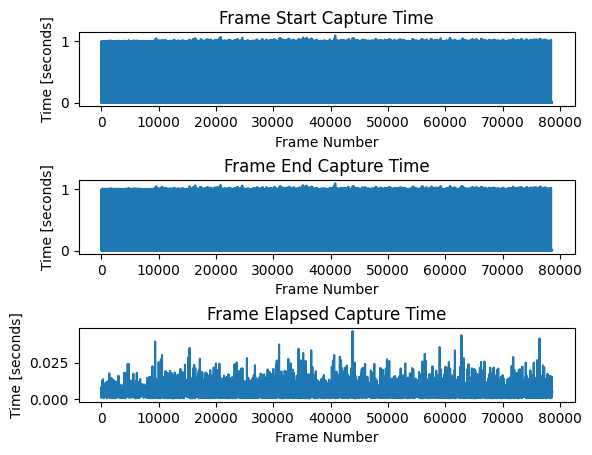

In [19]:
fig, axes = plt.subplots(3,1)

# First, plot the difference between the start capture times
axes[0].set_title('Frame Start Capture Time')
axes[0].set_xlabel('Frame Number')
axes[0].set_ylabel('Time [seconds]')
axes[0].plot(np.abs(np.diff(frame_timings_df['Begin'])))

# Then, plot the difference between the end capture times 
axes[1].set_title('Frame End Capture Time')
axes[1].set_xlabel('Frame Number')
axes[1].set_ylabel('Time [seconds]')
axes[1].plot(np.abs(np.diff(frame_timings_df['End'])))

# Then, plot the differences betweeen the start and end 
axes[2].set_title('Frame Elapsed Capture Time')
axes[2].set_xlabel('Frame Number')
axes[2].set_ylabel('Time [seconds]')
axes[2].plot(frame_timings_df['End'] - frame_timings_df['Begin'])

plt.subplots_adjust(hspace=1)

plt.show()

In [31]:
from collections import Counter 

val_freq = Counter(np.abs(np.diff(frame_timings_df['Begin'])))

for (key, val) in val_freq.most_common():
    print(f'Val: {key} | Freq: {val} \n')

0.004987001419067383

0.005017995834350586

0.004976987838745117

0.0049970149993896484

0.00498199462890625

0.005012035369873047

0.005002021789550781

0.004971027374267578

0.005028963088989258

0.004992008209228516

0.005023002624511719

0.004982948303222656

0.004992961883544922

0.004997968673706055

0.0050029754638671875

0.005033016204833984

0.005018949508666992

0.004945993423461914

0.005007028579711914

0.0049610137939453125

0.004976034164428711

0.0050640106201171875

0.004966020584106445

0.005012989044189453

0.0049669742584228516

0.004940032958984375

0.004971981048583984

0.0049779415130615234

0.0050089359283447266

0.004981040954589844

0.0050280094146728516

0.005048990249633789

0.004996061325073242

0.00495600700378418

0.0049550533294677734

0.004991054534912109

0.005023956298828125

0.0049860477447509766

0.004930019378662109

0.005053997039794922

0.004951000213623047

0.004987955093383789

0.005001068115234375

0.004951953887939453

0.005033969879150391

0.

In [ ]:
print(len(chunks))

chunk_0, chunk_1 = Camera_util.parse_mean_frame_array_buffer(chunks[0]), Camera_util.parse_mean_frame_array_buffer(chunks[1])



In [ ]:
Camera_util.plot_fit(fits[0], 199.8157786771373, start_second=58, end_second=60)


Analyzing chunk 1/6 with size: 60 buffers/seconds...
Observed FPS: 200.2
R2: 0.16314362931318416
Amplitude: 0.11066877426893483


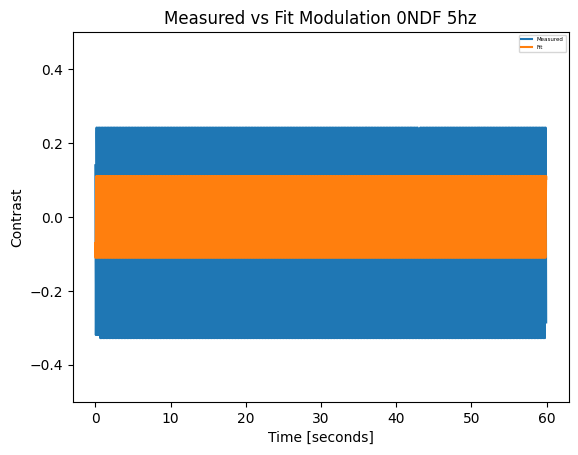

Analyzing chunk 2/6 with size: 60 buffers/seconds...
Observed FPS: 200.2
R2: 0.0019659201174299836
Amplitude: 0.012206357101638275


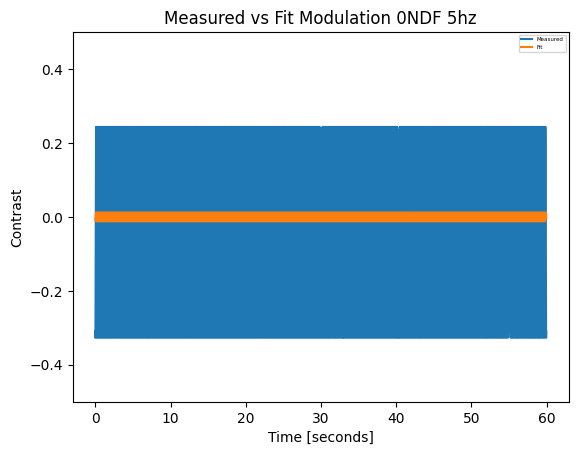

Analyzing chunk 3/6 with size: 60 buffers/seconds...
Observed FPS: 200.2
R2: 0.04813361862574452
Amplitude: 0.06047173455800162


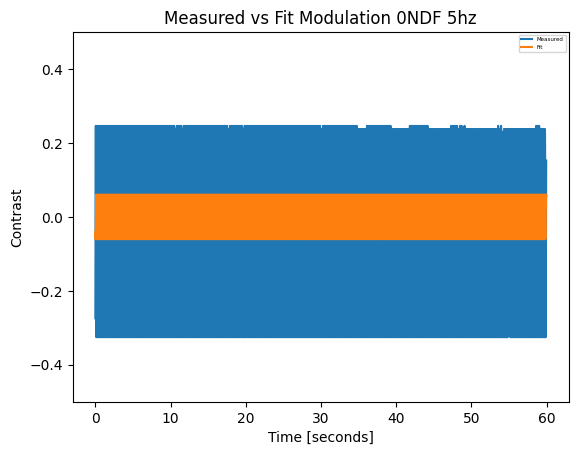

Analyzing chunk 4/6 with size: 60 buffers/seconds...
Observed FPS: 200.2
R2: 0.009580400836500483
Amplitude: 0.026900469563545165


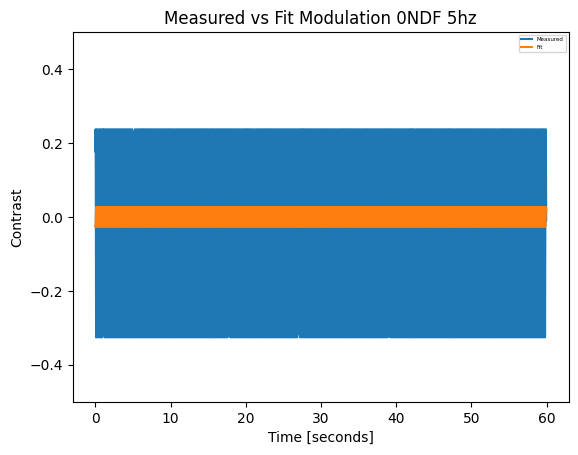

Analyzing chunk 5/6 with size: 60 buffers/seconds...
Observed FPS: 200.2
R2: 0.025650676608157934
Amplitude: 0.044114695007626985


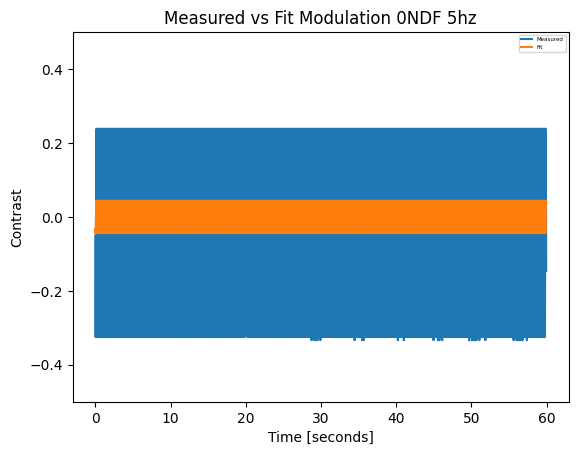

Analyzing chunk 6/6 with size: 51 buffers/seconds...
Observed FPS: 200.2
R2: 0.001418019556998135
Amplitude: 0.010411739590409851


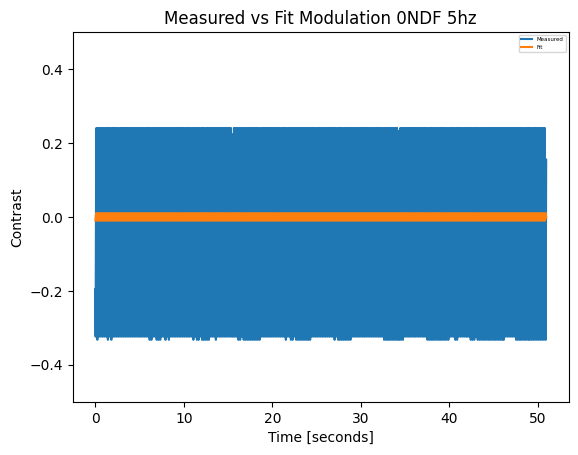

In [28]:
# Examine the world cam data 
sys.path.append('/Users/zacharykelly/Documents/MATLAB/projects/combiExperiments/code/lightLogger/camera') # append the path to the camera libraries so we can use their files
import recorder     
import Camera_util

importlib.reload(Camera_util)

# Define the chunksize of time to analyze at a given time 
chunk_seconds: int = 60 # Look at one minute chunks

# Load in the paths20 to the 1-second buffer files 
buffer_files: list = [os.path.join(world_cam_dir, file) 
                     for file in natsorted(os.listdir(world_cam_dir))]

# Define the chunks
chunks: list = [buffer_files[i:i+chunk_seconds] 
               for i in range(0, len(buffer_files), chunk_seconds)]

# Initialize a container for the fit info for each chunk 
r2_values: list = []
amplitudes: list = []
phases: list = []
fpss: list = []

# Retrieve a list of the fi%matplotlib widgetts of the observed modulations
fits: list = []

# Iterate over the chunks
for chunk_idx, chunk in enumerate(chunks):
    print(f'Analyzing chunk {chunk_idx+1}/{len(chunks)} with size: {len(chunk)} buffers/seconds...')

    # Load in the frames from this chunk
    chunk_frames: np.ndarray = Camera_util.parse_mean_frame_array_buffer(chunk)

    # Initialize an axis to display the fit on 
    fig, ax = plt.subplots(1,1)

    # Fit the modulation for this chunk (without plotting)
    #print(f'Estimating fit with: {recorder.CAM_FPS}FPS')
    ret_info: tuple = Camera_util.fit_source_modulation(chunk_frames, str(NDF), frequency, ax=ax, fps_guess=200.2, fps_guess_increment=(0,0))

    # Retrieve the amplitude and phase for the fit 
    amplitude, phase, observed_fps = ret_info[:3]

    # Retrieve the R2 from the ret information
    r2: float = ret_info[-1][-1] 

    # Append the info to the running lists of info 
    r2_values.append(r2)
    amplitudes.append(amplitude)
    phases.append(phase)
    fits.append(ret_info[-1][:-1])
    fpss.append(observed_fps)

    # Show the fit
    plt.show()

    # Close the figure
    plt.close(fig)



/var/folders/fb/55l_tk897yjbwpmc6_mm1ylm0000gp/T/ipykernel_2964/1149544202.py:30: RuntimeWarning: invalid value encountered in log10
  log_ax.plot(np.log10(measurement))


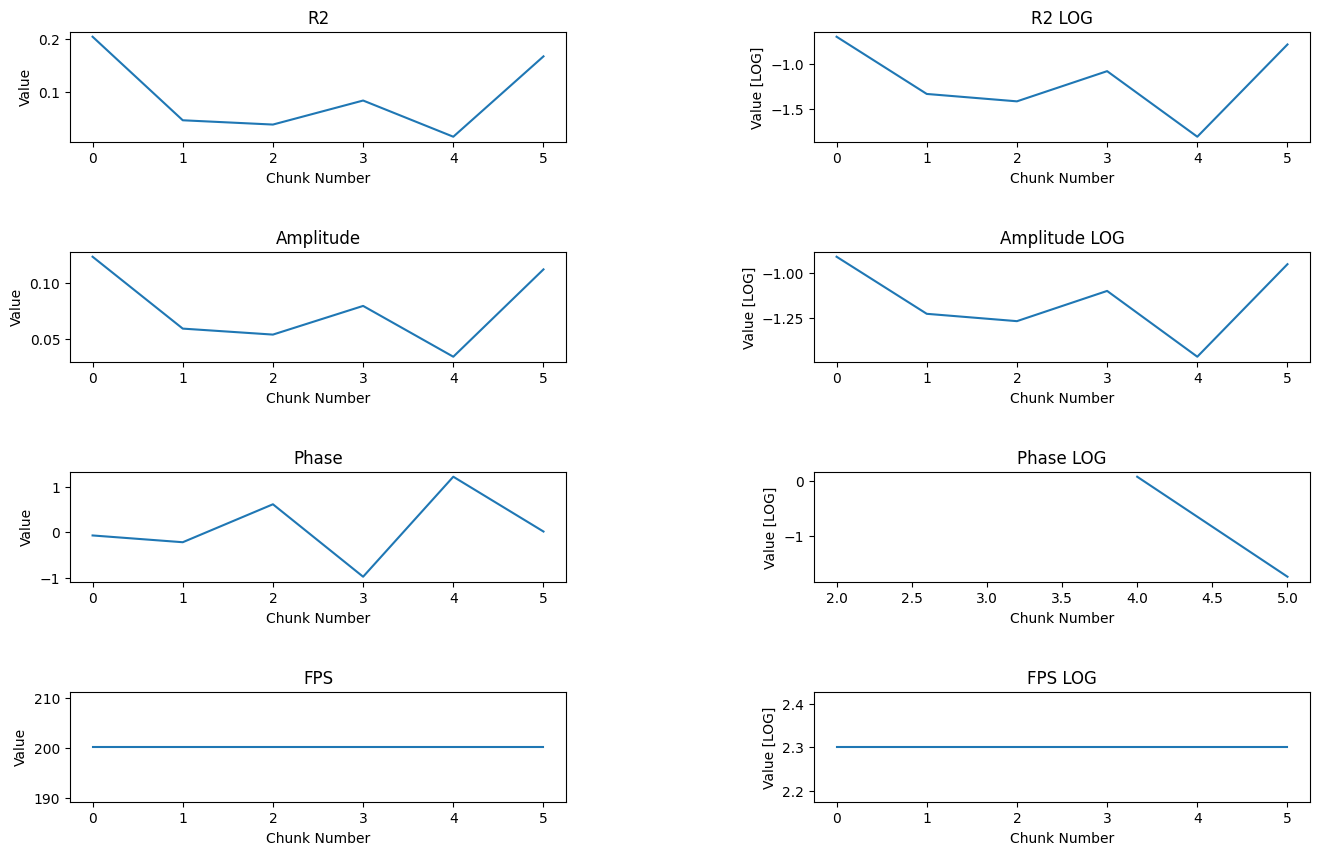

In [21]:
# Plot the R2, amplitudes, and phase by buffer 
# in both log and non-log scale
fig, axes = plt.subplots(4,2, figsize=(16,10))

# Keep track of what axis we are on 
ax_num: int = 0 

# Iterate over the measurements with their associated axes and plot them
for i, (measurement, name, ax_row) in enumerate(zip((r2_values, amplitudes, phases, fpss), ('R2', 'Amplitude', 'Phase', 'FPS'), axes)):
    # Retrieve the base 10 ax to plot on 
    # and the log ax 
    ax: plt.Axes = ax_row[0]
    log_ax: axes = ax_row[1]

    # Title the graphs
    ax.set_title(name)
    log_ax.set_title(f'{name} LOG')

    # Label the X axes 
    ax.set_xlabel('Chunk Number')
    log_ax.set_xlabel('Chunk Number')


    # Label the Y axes
    ax.set_ylabel('Value')
    log_ax.set_ylabel('Value [LOG]')

    # Plot the data 
    ax.plot(measurement)
    log_ax.plot(np.log10(measurement))


    # Update the ax num
    ax_num += 2 
    
# Adjust the spacing in the plot
plt.subplots_adjust(wspace=0.5, hspace=1)

# Show the plot
plt.show()

In [30]:
avg_r2_100, median_r2_100 = np.mean(r2_values), np.median(r2_values)

print(avg_r2_100)
print(median_r2_100)

0.041648710843002534
0.01761553872232921


In [24]:
avg_r2_30, median_r2_30 = np.mean(r2_values), np.median(r2_values)

print(avg_r2_30)
print(median_r2_30)

0.06494142402192282